In [11]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from functions import plot_history

from keras.models import Model
from keras.datasets import mnist

from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout

In [2]:
# Loads the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Reshapes the data to work in a FFN
X_train = train_data.reshape((60000, 28*28)) / 255
X_test = test_data.reshape((10000, 28*28)) / 255
num_classes = 10
y_train = to_categorical(train_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


# FFN

The FeedForward Network (FFN) is a simple type of network, where information is fed from the input to the output layer, passing through hidden layers in between. The FFN is fully connected, meaning all neurons in between layers are connected to each other. FFNs are powerful but also computationally expensive. However, for the small MNIST dataset, which has a small dimensionality, the FFN is a good fit.

In [79]:
with tf.device('/cpu:0'):

    # Initiate sequential model
    model_ffn = Sequential([
        
    # Add layer
    Dense(16, activation = 'relu', input_shape = (784,))
    ])
    
    # Add output layer - 10 neurons as there are 10 classes
    model_ffn.add(Dense(10, activation = 'softmax'))

    # Compile the model
    model_ffn.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])

    # Train the model
    history = model_ffn.fit(X_train, 
            y_train, 
            epochs = 20, 
            batch_size = 32,
            validation_data = (X_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 1s 683us/step - loss: 0.4382 - accuracy: 0.8756 - val_loss: 0.2660 - val_accuracy: 0.9232
Epoch 2/20
1875/1875 [==============================] - 1s 574us/step - loss: 0.2482 - accuracy: 0.9279 - val_loss: 0.2221 - val_accuracy: 0.9383
Epoch 3/20
1875/1875 [==============================] - 1s 600us/step - loss: 0.2153 - accuracy: 0.9390 - val_loss: 0.2009 - val_accuracy: 0.9420
Epoch 4/20
1875/1875 [==============================] - 1s 570us/step - loss: 0.1953 - accuracy: 0.9441 - val_loss: 0.1916 - val_accuracy: 0.9443
Epoch 5/20
1875/1875 [==============================] - 1s 600us/step - loss: 0.1819 - accuracy: 0.9481 - val_loss: 0.1919 - val_accuracy: 0.9442
Epoch 6/20
1875/1875 [==============================] - 1s 628us/step - loss: 0.1712 - accuracy: 0.9507 - val_loss: 0.1785 - val_accuracy: 0.9488
Epoch 7/20
1875/1875 [==============================] - 1s 580us/step - loss: 0.1629 - accuracy: 0.9527 - val_loss: 0.1783 -

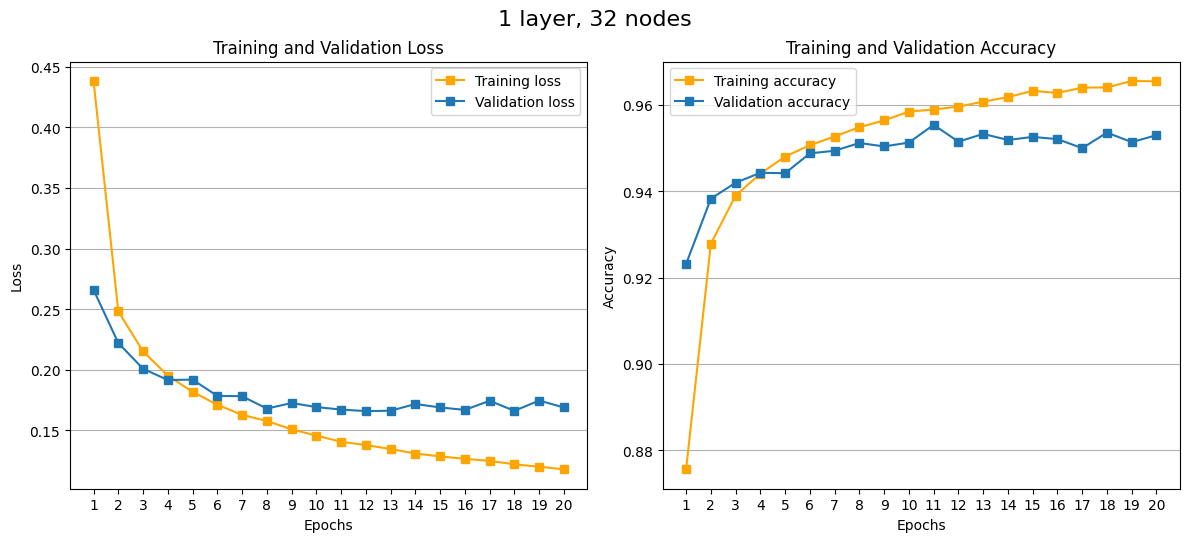

In [80]:
plot_history(history, '1 layer, 32 nodes')

# Result interpretation

The accuracy of this FFN is slightly worse than that of the SVM made in the shallow learning notebook (approximately 95% compared to 96.59%). However, where the SVM model took 4 minutes and 15 seconds to train, this neural network took 22 seconds (or approximately 1 second per epoch), which makes the performance impressive. Even more impressive is that the FFN is slightly overfitting, which means with some added regulazation the accuracy could improve.

Let's add some regularization to the last FFN model.

In [14]:
with tf.device('/cpu:0'):

    # Initiate sequential model
    model_ffn = Sequential([
        
    # Add layer
    Dense(16, activation = 'relu', input_shape = (784,)),
    Dropout(0.05) # for each batch, 5% of the neurons are disactivated
    ])
    
    # Add output layer
    model_ffn.add(Dense(10, activation = 'softmax'))

    # Compile the model
    model_ffn.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])

    # Train the model
    history = model_ffn.fit(X_train, 
            y_train, 
            epochs = 20, 
            batch_size = 32,
            validation_data = (X_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 2s 727us/step - loss: 0.5137 - accuracy: 0.8474 - val_loss: 0.2808 - val_accuracy: 0.9187
Epoch 2/20
1875/1875 [==============================] - 1s 586us/step - loss: 0.3151 - accuracy: 0.9067 - val_loss: 0.2418 - val_accuracy: 0.9304
Epoch 3/20
1875/1875 [==============================] - 1s 596us/step - loss: 0.2797 - accuracy: 0.9165 - val_loss: 0.2275 - val_accuracy: 0.9321
Epoch 4/20
1875/1875 [==============================] - 1s 607us/step - loss: 0.2545 - accuracy: 0.9253 - val_loss: 0.2020 - val_accuracy: 0.9411
Epoch 5/20
1875/1875 [==============================] - 1s 574us/step - loss: 0.2380 - accuracy: 0.9283 - val_loss: 0.1917 - val_accuracy: 0.9458
Epoch 6/20
1875/1875 [==============================] - 1s 555us/step - loss: 0.2270 - accuracy: 0.9321 - val_loss: 0.1903 - val_accuracy: 0.9456
Epoch 7/20
1875/1875 [==============================] - 1s 575us/step - loss: 0.2173 - accuracy: 0.9328 - val_loss: 0.1802 -

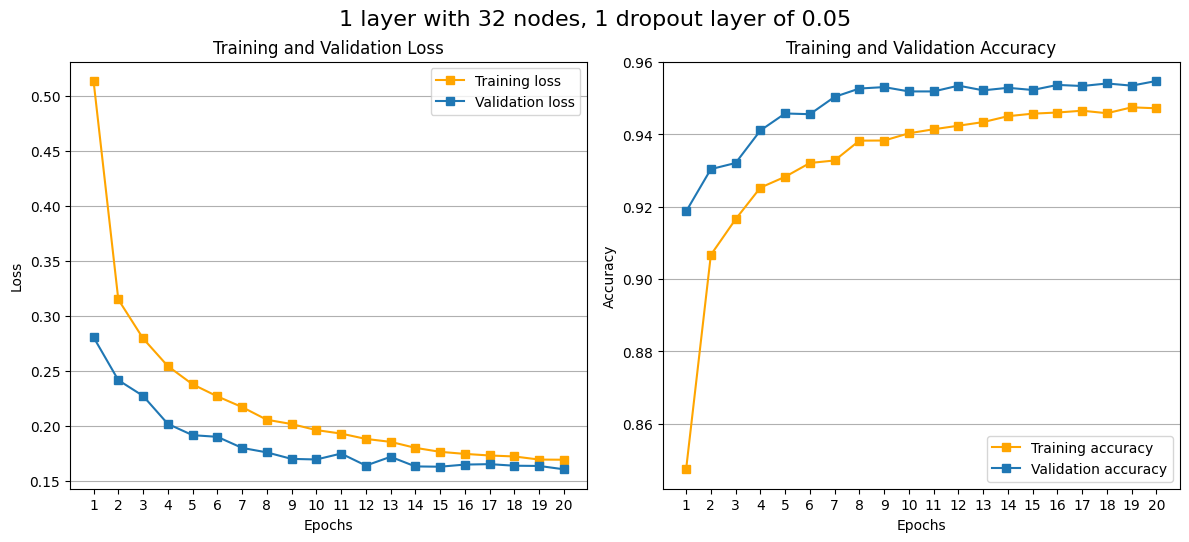

In [16]:
plot_history(history, '1 layer with 32 nodes, 1 dropout layer of 0.05')

# Second result interpretation

There was a slight improvement in the performance, which bumped it up to approximately 95.5%. Another option could be to let the model run for more epochs, but this was just to demonstrate the capabilities of the FFN.

Next up is the Convolutional Neural Network (CNN), which is a neural network especially made for image recognition and classification (although it has also been found to work well sequential data, such as Natural Language Processing (NLP)).

In [22]:

with tf.device('/cpu:0'):

    # Initiate sequential model
    model_cnn = Sequential([
    
    # Add first Convolutional layer - input_shape is (28, 28, 1)
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    
    # Flatten the tensor output from the previous layer
    Flatten(),

    # Add output layer - 10 neurons as there are 10 classes
    Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model_cnn.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    # Reshape data from 1D (784,) to 3D (28, 28, 1)
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # Train the model
    history = model_cnn.fit(X_train, 
            y_train, 
            epochs=20, 
            batch_size=32,
            validation_data=(X_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1767 - accuracy: 0.9494 - val_loss: 0.0793 - val_accuracy: 0.9750
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0691 - accuracy: 0.9799 - val_loss: 0.0681 - val_accuracy: 0.9791
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0620 - val_accuracy: 0.9799
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0645 - val_accuracy: 0.9803
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0627 - val_accuracy: 0.9815
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0668 - val_accuracy: 0.9807
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0709 - val_accuracy:

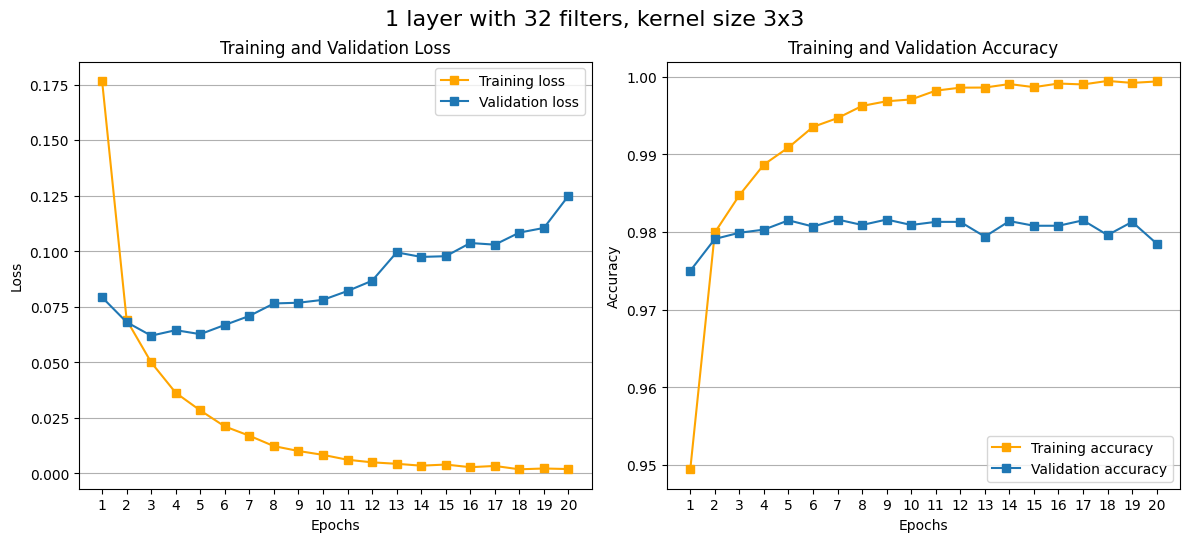

In [33]:
plot_history(history, '1 layer with 32 filters, kernel size 3x3')

## First CNN results

This model takes considerably longer to train, but does also get a good accuracy of 98%. Unfortunately, the plots show that there is strong overfitting which is a testament to how strong the architecture is. 

For the next model regularization, in the form of dropout, is used, which should curb the overfitting and maybe add a little bit of performance.

In [4]:
with tf.device('/cpu:0'):

    # Initiate sequential model
    model_cnn = Sequential([
    
    # Add first Convolutional layer - input_shape is (28, 28, 1)
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    Dropout(.7),

    # Flatten the tensor output from the previous layer
    Flatten(),

    # Add output layer - 10 neurons as there are 10 classes
    Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model_cnn.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    # Reshape data from 1D (784,) to 3D (28, 28, 1)
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

    # Train the model
    history = model_cnn.fit(X_train, 
            y_train, 
            epochs=20, 
            batch_size=32,
            validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2423 - accuracy: 0.9283 - val_loss: 0.0996 - val_accuracy: 0.9712
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1266 - accuracy: 0.9621 - val_loss: 0.0783 - val_accuracy: 0.9753
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1065 - accuracy: 0.9679 - val_loss: 0.0723 - val_accuracy: 0.9770
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0933 - accuracy: 0.9713 - val_loss: 0.0625 - val_accuracy: 0.9799
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0854 - accuracy: 0.9743 - val_loss: 0.0611 - val_accuracy: 0.9794
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0757 - accuracy: 0.9764 - val_loss: 0.0579 - val_accuracy: 0.9809
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0709 - accuracy: 0.9773 - val_loss: 0.0591 - val_ac

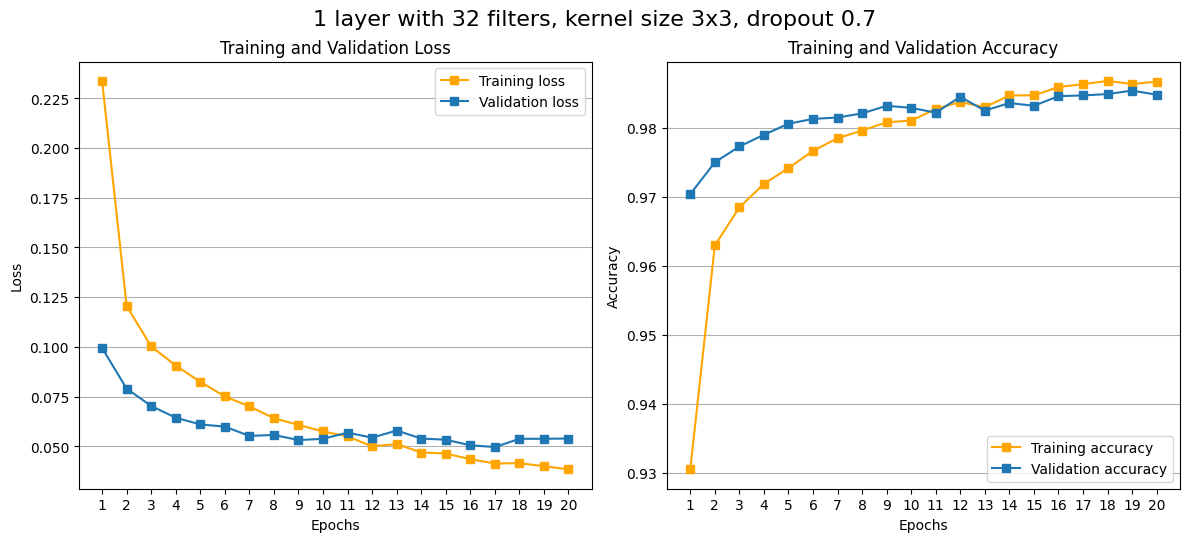

In [82]:
plot_history(history, '1 layer with 32 filters, kernel size 3x3, dropout 0.7')

In [6]:
y_pred = model_cnn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

 19/313 [>.............................] - ETA: 0s 

2023-07-25 16:05:47.923416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


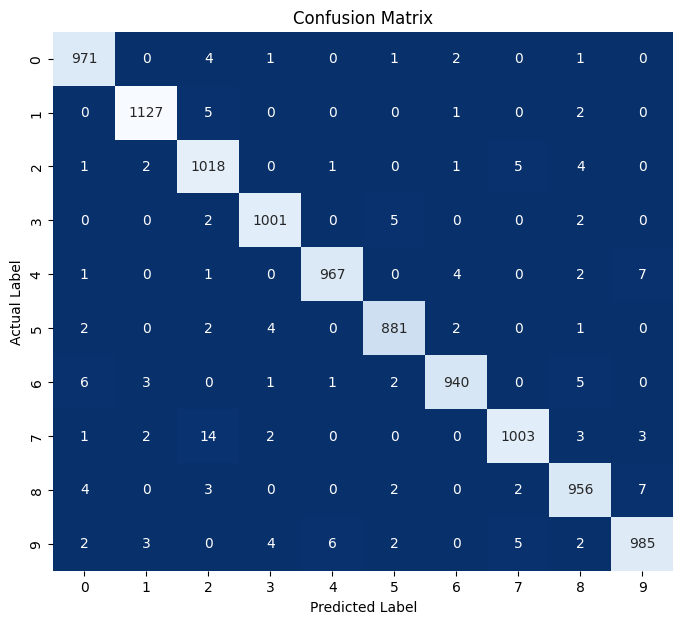

In [7]:
cm = confusion_matrix(y_true, y_pred) 

plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

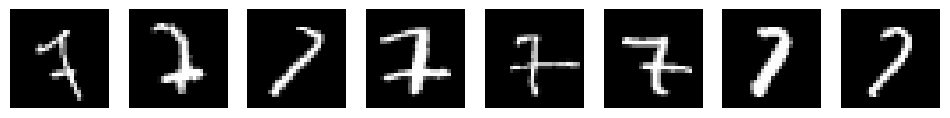

In [8]:
# Subset for the actual images of a 7, and the predicted images of a 2
misclassed = (y_true == 7) & (y_pred == 2)

# Get the images
misclassed_img = X_test[misclassed]

# Plot
num_img = 8
fig, axes = plt.subplots(1, num_img, figsize=(12, 4))

for i in range(num_img):
    axes[i].imshow(np.reshape(misclassed_img[i], (28, 28)), cmap='gray')
    axes[i].axis('off')
plt.show()

## Second CNN results

There was some testing done with different amounts of dropout, and the best performing amount of dropout was pretty staggering, to be honest. The dropout layer did help curb the overfitting and also boosted the accuracy a tiny bit.

The confusion matrix looks pretty clean and the misclassifications being made make sense. <br>
When seeing some of the 4s which are predicted as 9s, it does seem odd that they were missclassified. Nonetheless, the performance of the model is impressive.

Finally, let us look at activation functions in the Conv2D layer.

1/1 [==============================] - 0s 32ms/step


2023-07-25 16:14:22.160802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


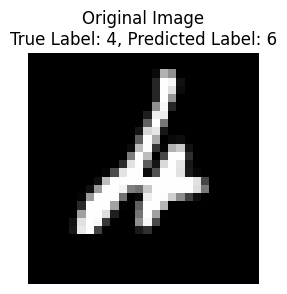

/var/folders/mk/gfwqkwrn0rqcr7cnz8b3gj100000gn/T/ipykernel_2562/3798940664.py:48: RuntimeWarning: invalid value encountered in divide
  feature_map /= feature_map.std()


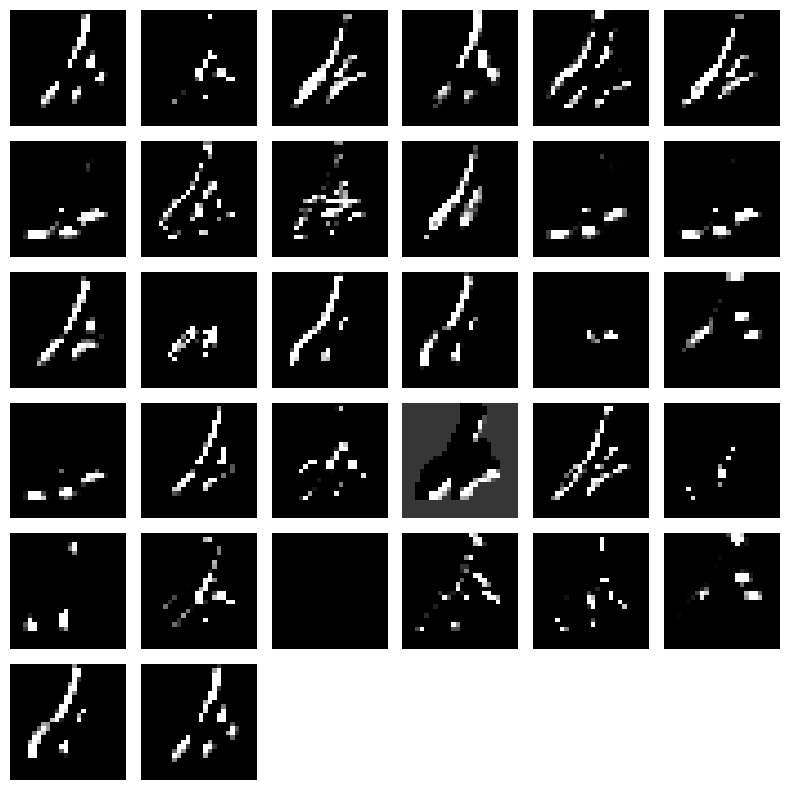

In [18]:
# Misclassified instances
misclassified_indices = np.where(y_true != y_pred)[0]

# First misclassification
img = X_test[misclassified_indices[0]]

# Labels for the misclassification
true_label = y_true[misclassified_indices[0]]
predicted_label = y_pred[misclassified_indices[0]]

# Reshape the image to the expected input shape, i.e., (1, height, width, channels)
img_tensor = img.reshape((1, 28, 28, 1))

# Initiate the viz_model to get the activations
layer_name = 'conv2d_1' # The layer we want to visualize
intermediate_layer_model = Model(inputs=model_cnn.input,
                                 outputs=model_cnn.get_layer(layer_name).output)

# Get the output
output = intermediate_layer_model.predict(img_tensor)

# Number of features in the feature map
num_features = output.shape[-1]

# Set grid size
size = int(np.ceil(np.sqrt(num_features)))

# Display original image
plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray')
plt.title(f'Original Image\nTrue Label: {true_label}, Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

# Figure for activations
fig, axs = plt.subplots(size, size, figsize=(8,8))

# Postprocess the feature
for i in range(size*size):
    row = i//size
    col = i%size
    
    if i < num_features:
        # Grab the feature map for the ith feature
        feature_map = output[0, :, :, i]
        # Normalize the feature map
        feature_map -= feature_map.mean()
        feature_map /= feature_map.std()
        feature_map *=  64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype('uint8')

        # Plot feature map
        axs[row, col].imshow(feature_map, cmap='gray')
        axs[row, col].axis('off')
    else:
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()

## Activations of the layer

First of all, the original image shows what supposedly is the number 4, but is misclassified as the number 6, and the handwriting is admittedly not very good. Secondly, interpretting what happens in a layer of a neural network can be challenging. Luckily, the images used here are not too complex.

The bright areas in the images are the areas where the network detects features - in this case lines. There are 32 images, since the network has 32 filters (or kernels). It looks like the layer acts as an edge detector marking the edges of the number, which seems like a good strategy when identifying numbers and letters. 